<a href="https://colab.research.google.com/github/Cristalreal/Cristalreal/blob/main/ML_Unsupervised_methods_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sometimes we do not have the luxury of using labelled data. This could be for a number of reasons:

* We have labelled data, but not enough to accurately train our model
* Our existing labelled data is low-quality or innacurate
* It is too time-consuming to (manually) label more data
* We have data, but no idea what correlations might exist that we could model!

In this case we need to use unsupervised learning. As the name suggests, this time we do not “supervise” the ML algorithm by providing it labels, but instead we let it try to find its own patterns in the data and report back on any correlations that it might find without being trained on it. You can think of unsupervised learning as a way to discover labels from the data itself.

# Clustering

Clustering is the grouping of data points which are similar to each other. It can be a powerful technique for identifying patterns in data. Clustering analysis does not usually require any training and is therefore known as an unsupervised learning technique. Clustering can be applied quickly due to this lack of training.

Applications for clustering
* Looking for trends in data
* Reducing the data around a point to just that point (e.g. reducing colour depth in an image)
* Pattern recognition

### K-means clustering
Simple clustering algorithm that tries to identify the centre of each cluster.

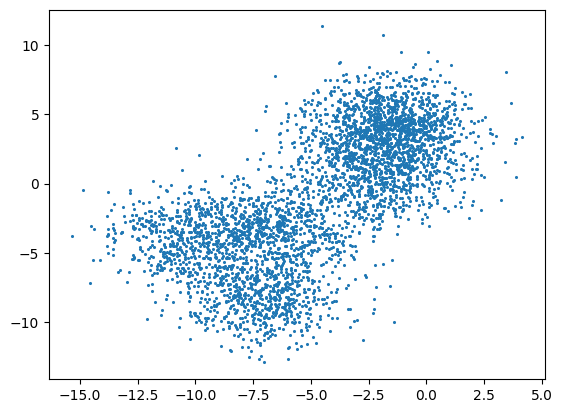

In [18]:
# Import libraries and datasets
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_datasets
import matplotlib.pyplot as plt

# create random clusters of point (4 since we defined 4 centers) that we can use as data to investigate
data, cluster_id = skl_datasets.make_blobs(n_samples=400, cluster_std=.75, centers=4, random_state=1)
plt.scatter(data[:,0], data[:,1], s=5, linewidth=0)

#output shows 4 clusters/centers of points
plt.show()

In [19]:
#  identify the clusters using k-means.
#n_clusters is k so we need to give it the same number of clusters we previosuly made (4)
Kmean = skl_cluster.KMeans(n_clusters=4)
Kmean.fit(data)
clusters = Kmean.predict(data)

#shows future warning that we can ignore

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


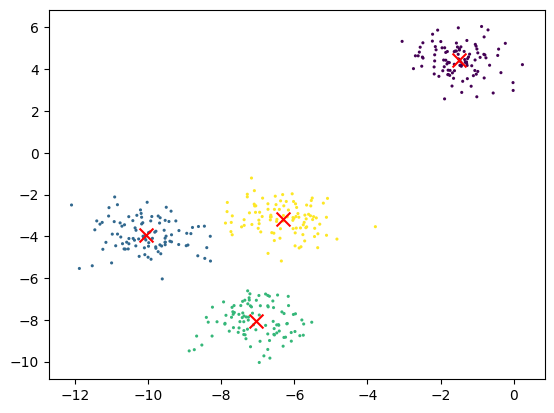

In [22]:
#plot the points that we want

plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)

#where it identified the centre of each cluster
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')

# plot the points from the clusters, colouring them by the output from the K-means algorithm, and also plot the centres of each cluster as a red X.
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


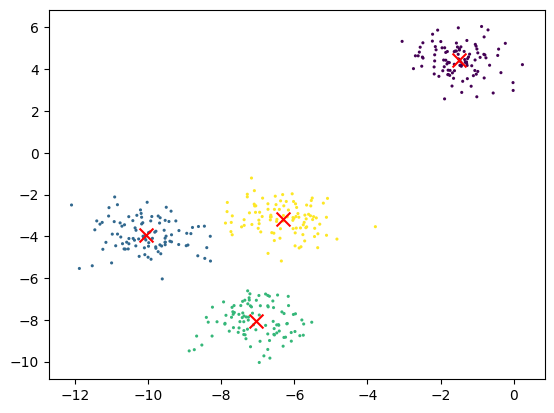

In [21]:
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_datasets
import matplotlib.pyplot as plt

data, cluster_id = skl_datasets.make_blobs(n_samples=400, cluster_std=0.75, centers=4, random_state=1)

Kmean = skl_cluster.KMeans(n_clusters=4)
Kmean.fit(data)
clusters = Kmean.predict(data)

plt.scatter(data[:, 0], data[:, 1], s=5, linewidth=0, c=clusters)
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')
plt.show()

Limitations of k-means

* Requires number of clusters to be known in advance
* Struggles when clusters have irregular shapes
* Will always produce an answer finding the required number of clusters even if the data isn’t clustered (or clustered in that many clusters)
* Requires linear cluster boundaries

Advantages of k-means

* Simple algorithm and fast to compute
* A good choice as the first thing to try when attempting to cluster data
* Suitable for large datasets due to its low memory and computing requirements

### Spectracl clustering

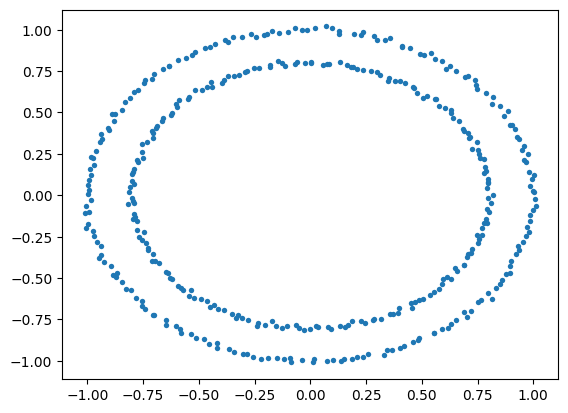

In [24]:
# import libraries and datasets
import sklearn.datasets as skl_data

#make concentric/nested circles
circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


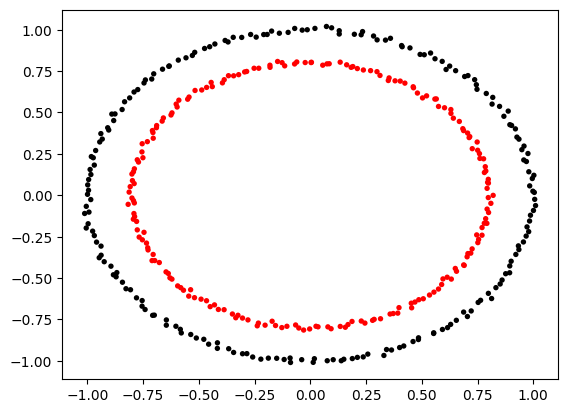

In [25]:
#define our model
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

#Fit model to data
#SpectralClustering class combines the fit and predict functions into a single function called fit_predict.
labels = model.fit_predict(circles)
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels, cmap='flag')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


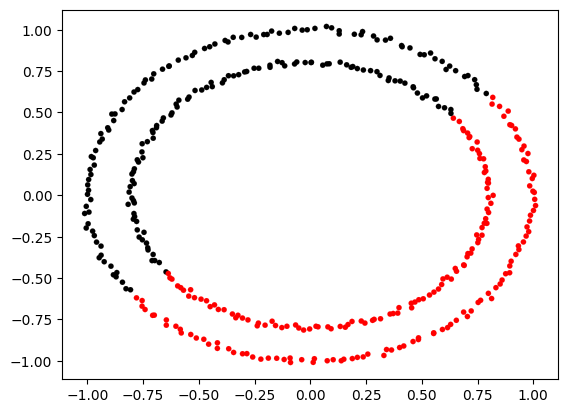

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


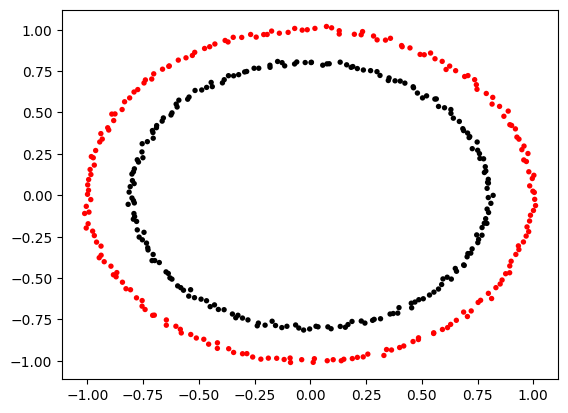

In [26]:
# whole program combined with the kmeans clustering for comparison
import sklearn.cluster as skl_cluster
import sklearn.datasets as skl_data

circles, circles_clusters = skl_data.make_circles(n_samples=400, noise=.01, random_state=0)

# cluster with kmeans
Kmean = skl_cluster.KMeans(n_clusters=2)
Kmean.fit(circles)
clusters = Kmean.predict(circles)

# plot the data, colouring it by cluster
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0.1, c=clusters,cmap='flag')
plt.show()

# cluster with spectral clustering
model = skl_cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(circles)
plt.scatter(circles[:, 0], circles[:, 1], s=15, linewidth=0, c=labels, cmap='flag')

# produces two figures
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

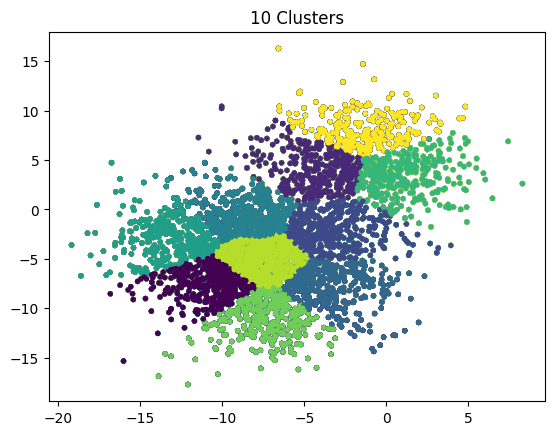

Elapsed time =  2.5257668495178223 seconds


In [27]:
#comparing Kmeans and spectral version

import matplotlib.pyplot as plt
import sklearn.cluster as skl_cluster
from sklearn.datasets import make_blobs
import time

start_time = time.time()
data, cluster_id = make_blobs(n_samples=4000, cluster_std=3,
                                       centers=4, random_state=1)

for cluster_count in range(2,11):
    Kmean = skl_cluster.KMeans(n_clusters=cluster_count)
    Kmean.fit(data)
    clusters = Kmean.predict(data)

    plt.scatter(data[:, 0], data[:, 1], s=15, linewidth=0, c=clusters)
    plt.title(str(cluster_count)+" Clusters")

plt.show()

end_time = time.time()
print("Elapsed time = ", end_time-start_time, "seconds")

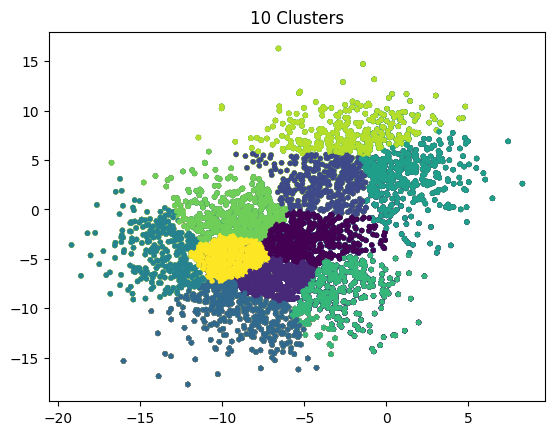

Elapsed time =  21.155233144760132 seconds


In [28]:
import matplotlib.pyplot as plt
import sklearn.cluster as skl_cluster
from sklearn.datasets import make_blobs
import time

start_time = time.time()
data, cluster_id = make_blobs(n_samples=4000, cluster_std=3,
                                       centers=4, random_state=1)

for cluster_count in range(2,11):
    model = skl_cluster.SpectralClustering(n_clusters=cluster_count,
                                       affinity='nearest_neighbors',
                                       assign_labels='kmeans')
    labels = model.fit_predict(data)

    plt.scatter(data[:, 0], data[:, 1], s=15, linewidth=0, c=labels)
    plt.title(str(cluster_count)+" Clusters")
plt.show()
end_time = time.time()
print("Elapsed time = ", end_time-start_time, "seconds")